In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ClaseAbdon import DataFrameAnalyzer

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
df = titanic.copy()

In [210]:
print(f'{titanic.memory_usage().sum()/1024}KB')

80.65625KB


In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.to_excel('titanic.xlsx',index=False)

In [212]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [213]:
titanic.shape

(891, 15)

In [214]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [215]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [216]:
# verificamos nulos
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Como primera exploracion podemos ver que tenemos 177 nulos en las edades y 688 en deck.

In [217]:
titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [219]:
# Podemos ver que hay columnas duplicadas vamos a verificar que podemos hacer con ellas.
titanic.pop('alive')

0       no
1      yes
2      yes
3      yes
4       no
      ... 
886     no
887    yes
888     no
889    yes
890     no
Name: alive, Length: 891, dtype: object

In [220]:
print((titanic[titanic['embarked'].isnull()]))
print((titanic[titanic['embark_town'].isnull()]))
# Son exactamente las mismas, borramos Embarked
titanic.pop('embarked')

     survived  pclass     sex   age  sibsp  parch  fare embarked  class  \
61          1       1  female  38.0      0      0  80.0      NaN  First   
829         1       1  female  62.0      0      0  80.0      NaN  First   

       who  adult_male deck embark_town  alone  
61   woman       False    B         NaN   True  
829  woman       False    B         NaN   True  
     survived  pclass     sex   age  sibsp  parch  fare embarked  class  \
61          1       1  female  38.0      0      0  80.0      NaN  First   
829         1       1  female  62.0      0      0  80.0      NaN  First   

       who  adult_male deck embark_town  alone  
61   woman       False    B         NaN   True  
829  woman       False    B         NaN   True  


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [221]:
titanic.pop('class')

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: class, Length: 891, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

## Tratamiento de Missing

In [222]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

In [223]:
# Podemos observar que la columna Deck tiene aproximadamente un 80% de nulos por lo que procederemos a eliminarla.

titanic.pop('deck')

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [224]:
titanic[titanic['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
5,0,3,male,NaN,0,0,8.4583,man,True,Queenstown,True
17,1,2,male,NaN,0,0,13.0000,man,True,Southampton,True
19,1,3,female,NaN,0,0,7.2250,woman,False,Cherbourg,True
26,0,3,male,NaN,0,0,7.2250,man,True,Cherbourg,True
28,1,3,female,NaN,0,0,7.8792,woman,False,Queenstown,True
...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,man,True,Cherbourg,True
863,0,3,female,NaN,8,2,69.5500,woman,False,Southampton,False
868,0,3,male,NaN,0,0,9.5000,man,True,Southampton,True
878,0,3,male,NaN,0,0,7.8958,man,True,Southampton,True


In [225]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
# los nulos en edades los reemplazamos con la media

In [226]:
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])
# los 2 nulos de embark los reemplazamos con la moda

In [227]:
analizar = DataFrameAnalyzer(titanic)

In [228]:
analizar.resumen()

,Columna,Tipo de Dato,Cardinalidad,% Cardinalidad,Valores Faltantes,% Valores Faltantes,Categoría
0,survived,int64,2,0.22,0,0.0,Binaria
1,pclass,int64,3,0.34,0,0.0,Numérica Discreta
2,sex,object,2,0.22,0,0.0,Binaria
3,age,float64,88,9.88,0,0.0,Numérica Continua
4,sibsp,int64,7,0.79,0,0.0,Numérica Discreta
5,parch,int64,7,0.79,0,0.0,Numérica Discreta
6,fare,float64,248,27.83,0,0.0,Numérica Continua
7,who,object,3,0.34,0,0.0,Categórica Nominal
8,adult_male,bool,2,0.22,0,0.0,Binaria
9,embark_town,object,3,0.34,0,0.0,Categórica Nominal


In [229]:
analizar.describe_numeric()

,count,mean,median,mode,std_dev,min,25%,50%,75%,max,skewness,kurtosis
survived,891.0,0.383838,0.0000,0.00,0.486592,0.00,0.0000,0.0000,1.0,1.0000,0.478523,-1.775005
pclass,891.0,2.308642,3.0000,3.00,0.836071,1.00,2.0000,3.0000,3.0,3.0000,-0.630548,-1.280015
age,891.0,29.361582,28.0000,28.00,13.019697,0.42,22.0000,28.0000,35.0,80.0000,0.510245,0.993871
sibsp,891.0,0.523008,0.0000,0.00,1.102743,0.00,0.0000,0.0000,1.0,8.0000,3.695352,17.880420
parch,891.0,0.381594,0.0000,0.00,0.806057,0.00,0.0000,0.0000,0.0,6.0000,2.749117,9.778125
fare,891.0,32.204208,14.4542,8.05,49.693429,0.00,7.9104,14.4542,31.0,512.3292,4.787317,33.398141


In [230]:
analizar.describe_categorical()

,unique_values,most_frequent,frequency,proportion
sex,2,male,577,64.76
who,3,man,537,60.27
embark_town,3,Southampton,646,72.50


In [231]:
titanic.shape

(891, 11)

In [232]:
edad = pd.cut(titanic['age'], [0,13,18,25,90], labels=['niños','adolescentes','adultos','senior'])

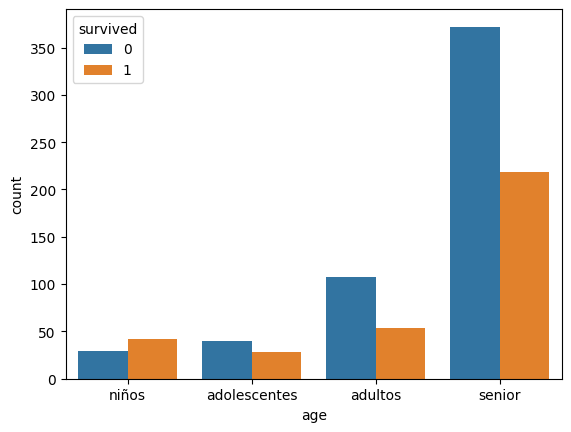

In [233]:
sns.countplot(data = titanic ,x = edad, hue='survived');

<Axes: xlabel='sex'>

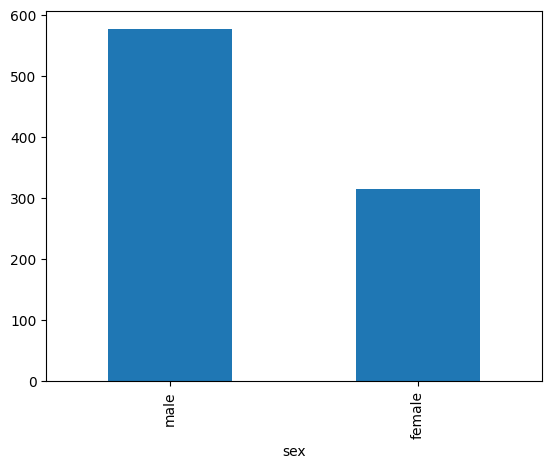

In [234]:
titanic['sex'].value_counts().plot(kind = 'bar')

In [235]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


In [236]:
titanic[['sex','survived']]

,sex,survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [258]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['sex'], df['alive'])
# Realizar el test de Chi-cuadrado
chi_2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-cuadrado:", chi_2)
print("p-value:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", expected)


Chi-cuadrado: 260.71702016732104
p-value: 1.1973570627755645e-58
Grados de libertad: 1
Frecuencias esperadas:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


In [263]:
from scipy.stats import chi2

alpha = 0.05
dof = 1
chi2_critical = chi2.ppf(1 - alpha, dof)
print("Valor crítico:", chi2_critical)

Valor crítico: 3.841458820694124


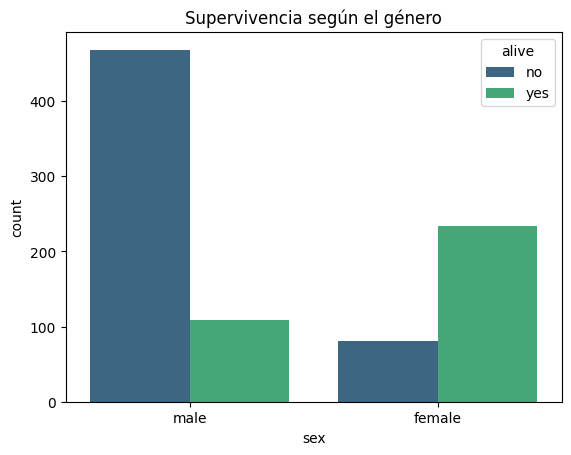

In [242]:
sns.countplot(x='sex', hue='alive', data=df, palette='viridis')
plt.title('Supervivencia según el género')
plt.show()

In [246]:
df[(df['sex'] == 'male')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [251]:
from scipy.interpolate import UnivariateSpline
import numpy as np

xs = np.arange(10)
ys = xs**2 + np.sin(xs) + 1
print(xs)
print(ys)
interp_func = UnivariateSpline(xs, ys)
print(interp_func)
newarr = interp_func(np.arange(2.1, 3, 0.1))

print(newarr)

[0 1 2 3 4 5 6 7 8 9]
[ 1.          2.84147098  5.90929743 10.14112001 16.2431975  25.04107573
 36.7205845  50.6569866  65.98935825 82.41211849]
[5.62826474 6.03987348 6.47131994 6.92265019 7.3939103  7.88514634
 8.39640439 8.92773053 9.47917082]


<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Abdon.RAMIREZ-BRICEN\AppData\Local\Temp\ipykernel_45520\3212149770.py:13: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('$\chi^2$')


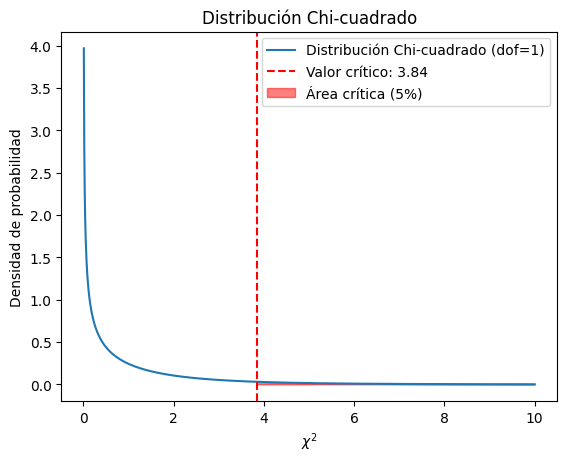

In [260]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

x = np.linspace(0, 10, 1000)
dof = 1
chi2_critical = chi2.ppf(1 - 0.05, dof)

plt.plot(x, chi2.pdf(x, dof), label='Distribución Chi-cuadrado (dof=1)')
plt.axvline(chi2_critical, color='red', linestyle='--', label=f'Valor crítico: {chi2_critical:.2f}')
plt.fill_between(x, 0, chi2.pdf(x, dof), where=(x > chi2_critical), color='red', alpha=0.5, label='Área crítica (5%)')
plt.title('Distribución Chi-cuadrado')
plt.xlabel('$\chi^2$')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.show()
